In [20]:
from scipy.linalg import solve
# Define the equation parameters
from scipy.special import erfc
import pandas as pd
import numpy as np
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.animation as FuncAnimation
from IPython.display import HTML
import seaborn as sns
from matplotlib.animation import PillowWriter

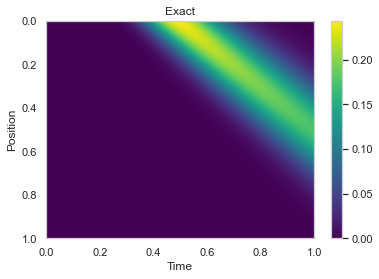

In [21]:
# Analytical - du/dt = -v*du/dx+D*d2u/dx2 - c*u +d

Ci = 0; 
Co = 1;
# dCinf/dx = 0;
R = 1; 
c = 0.0
D = 0.01
v = 1.0
d = 0.0
nx = 101;
nt = 1001;

L = 1.0;
T = 1.0;

x = np.linspace(0, L, nx);
t = np.linspace(0, T, nt);


C = np.zeros((nt, nx))

for i in range(nt):  
    for j in range(nx):
        C[i, j] = (0.025/(np.sqrt(0.000625 + 0.02*t[i])))*np.exp((-(x[j] + 0.5 - t[i])**2)/(0.00125 + 0.04*t[i]))
        
        # An = np.exp(-c*t[i]/R)*(1-(erfc((R*x[j]-v*t[i])/(2*np.sqrt(D*R*t[i]))))*0.5 -  0.5*(np.exp(v*x[j]/(D)))*(erfc((R*x[j]+v*t[i])/(2*np.sqrt(D*R*t[i])))))       
        # un = v*(np.sqrt(1+ (4*c*D)/(v**2)))
        # Bn = 0.5*np.exp(((v-un)*x[j])/(2*D))*(erfc((R*x[j]-un*t[i])/(2*np.sqrt(D*R*t[i])))) + 0.5*np.exp(((v+un)*x[j])/(2*D))*(erfc((R*x[j] + un*t[i])/(2*np.sqrt(D*R*t[i]))))
        # print(np.shape(An), np.shape(Bn))
        # C[i, j] = d/c + (Ci - d/c)*An + (Co-d/c)*Bn

U_exact = np.transpose(C);

fig = plt.figure()  
plt.imshow(np.transpose(C), cmap='viridis',  extent=[0, T, L, 0], aspect='auto')
plt.colorbar()
plt.title("Exact")
plt.xlabel('Time')
plt.ylabel('Position')

#fig.set_size_inches(30.,18.)
# plt.savefig('U_CDI.png', dpi = 900)
plt.show()

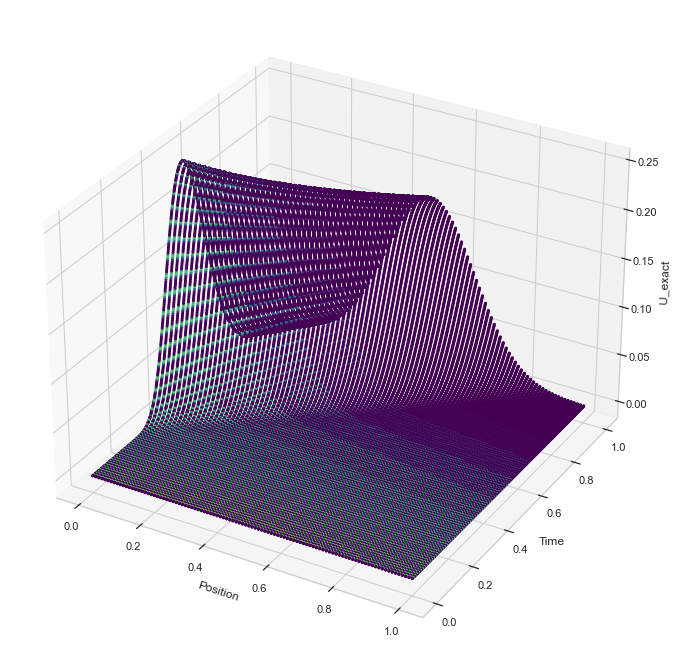

In [4]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")
ax = fig.add_subplot(111, projection = '3d')
X, Y = np.meshgrid(x, np.transpose(t))
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(X, Y, np.transpose(U_exact), s=4, c=U_exact, cmap = 'viridis', alpha = 1)
ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('U_exact')
plt.show()

In [5]:
# PSM test
# solving the 1D convection-diffusion equation using the spectral method



## CD Scheme without Zeroth and First Order Scheme

$$ \frac {\partial U}{\partial t} = D\frac {\partial^2 U}{\partial x^2} - v\frac {\partial U}{\partial x}$$

$$ 0<x<1 \ \ \ 0<t \leq 1 $$

$$ IC: U(x, 0) = \exp(- \frac {(x+0.5)^2}{0.00125}) $$ 
$$ BC - Left: U(0, t) = \frac{0.025}{\sqrt{0.000625 + 0.02t}} \exp\left[ - \frac{(0.5-t)^2}{(0.00125 + 0.04t)} \right] $$
$$ BC - Right:  U(1, t) = \frac{0.025}{\sqrt{0.000625 + 0.02t}} \exp \left[- \frac{(1.5-t)^2}{(0.00125 + 0.04t)} \right] $$ 
$$  0<t \leq 1 $$

### Analytical Solution - Para et al. 2022 ###
For v = 1.0 and D = 0.01
$$ U(x, t) = \frac{0.025}{\sqrt{0.000625 + 0.02t}} \exp \left[- \frac{(x+0.5-t)^2}{(0.00125 + 0.04t)}\right] $$ 


In [18]:
def numericalcodes(nx, nt):
    # Define the grid
    a = -1.0;
    b = 0.01;
    c = 0.0;
    d = 0.0;



    nx = 101
    nt = 1001
    L = 1.0
    T = 1.0
    # Define x & t
    x = np.linspace(0, L, nx)
    t = np.linspace(0, T, nt)


    # Dirichlet Boundary Condition
    left = (0.025/(np.sqrt(0.000625 + 0.02*t)))*(np.exp((-(0.5 - t)**2)/(0.00125 + 0.04*t)))*np.ones(nt)
    right = (0.025/(np.sqrt(0.000625 + 0.02*t)))*(np.exp((-(1.5 - t)**2)/(0.00125 + 0.04*t)))*np.ones(nt)

    fig = plt.figure()  
    plt.imshow(np.transpose(C), cmap='viridis',  extent=[0, T, L, 0], aspect='auto')
    plt.colorbar()
    plt.title("Exact")
    plt.xlabel('Time')
    plt.ylabel('Position')

    #fig.set_size_inches(30.,18.)
    # plt.savefig('U_CDI.png', dpi = 900)
    plt.show()


    # Discretization of space and time
    dx = L/(nx-1)
    dt = T/(nt-1)
    u = np.exp(-((x+0.5)**2)/(0.00125)) #np.zeros(nx);
    def numerical_scheme_QI(u_QI, dx, dt, l, r):
        a = -1.0;
        b = 0.01;
        
        alpha = a*dt
        beta = b*dt

        A = np.zeros((len(u_QI), len(u_QI)))
        bi = d*dt+u_QI;
        cQ = 3*alpha/(8*dx) - beta/(dx**2)
        bQ = -7*alpha/(8*dx) - beta/(dx**2)
        aQ = 3*alpha/(8*dx) + 2*beta/(dx**2) - c*dt
        eQ = 1*alpha/(8*dx)

        cnQ = 7*alpha/(8*dx) - beta/(dx**2)
        bnQ = -3*alpha/(8*dx) - beta/(dx**2)
        anQ = -3*alpha/(8*dx) + 2*beta/(dx**2) - c*dt
        enQ = -1*alpha/(8*dx)


        for j in range(1, len(u_QI)-2):

            A[j, j-1] = cQ
            A[j, j] = 1+aQ
            A[j, j+1] = bQ
            A[j, j+2] = eQ

        N = len(u_QI)-1

        A[N-1, N-2] = cnQ  # applied the a>0 terms for this one
        A[N-1, N-1] = 1+anQ
        A[N-1, N] = bnQ
        A[N-1, N-3] = enQ


        # Boundary condition
        # A[0, 0] = -3
        # A[0, 1] = 4
        # A[0, 2] = -1
        # bi[0] = 0

        # A[N, N] = 3
        # A[N, N-1] = -4
        # A[N, N-2] = 1
        # bi[N] = 0

        A[0,0] = 1.0
        A[N,N] = 1.0

        bi[0] = l
        bi[N] = r



        u_QI = solve(A, bi)

        return u_QI
    
    def numerical_scheme_PSM(u_PSM, nx, dx, dt, l, r):
        
        # Parameters
        L = 1.0        # Length of the domain
        N = nx         # Number of grid points
        T = 1.0         # Total time
        #a = alpha#0.1         # Diffusion coefficient
        #b = beta#1.0         # Convection coefficient
        a = -1.0;
        b = 0.01;
        c = 0#0.5         # Constant coefficient
        d = 0#0.1         # Source term coefficient
        step = 10;
        # Grid and initial conditions
        # x = np.linspace(0, L, N, endpoint=False)
        u0 = u_PSM # np.sin(2 * np.pi * x / L)  # Initial condition (sinusoidal profile)

        # Fourier wavenumbers
        k = 2 * np.pi * np.fft.fftfreq(N, d=L/N)

        # Time step and number of time steps
        # dt = 0.001
        # num_steps = int(T / dt)

        # Source term function
        def source_term(x, t):
            return d * np.sin(4 * np.pi * x / L) * np.exp(-t)

        # RK4 time integration function
        def rk4_step(u, dt, a, b, c, t):
            k1 = dt * (a * np.fft.ifft(-k**2 * np.fft.fft(u)) - b * np.fft.ifft(1j * k * np.fft.fft(u)) + c * u + source_term(x, t))
            k2 = dt * (a * np.fft.ifft(-k**2 * np.fft.fft(u + 0.5 * k1)) - b * np.fft.ifft(1j * k * np.fft.fft(u + 0.5 * k1)) + c * (u + 0.5 * k1) + source_term(x, t + 0.5 * dt))
            k3 = dt * (a * np.fft.ifft(-k**2 * np.fft.fft(u + 0.5 * k2)) - b * np.fft.ifft(1j * k * np.fft.fft(u + 0.5 * k2)) + c * (u + 0.5 * k2) + source_term(x, t + 0.5 * dt))
            k4 = dt * (a * np.fft.ifft(-k**2 * np.fft.fft(u + k3)) - b * np.fft.ifft(1j * k * np.fft.fft(u + k3)) + c * (u + k3) + source_term(x, t + dt))
            return u + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0

        # Main loop
        u = u0.copy()

        #for step in range(num_steps):
        t = step * dt

        # RK4 time integration step
        u = rk4_step(u, dt, a, b, c, t)
        u[0] = l  # Left boundary
        u[-1] = r  # Right boundary   
        # Plot the final result
        # plt.figure()
        # plt.plot(x, u, label='Final Solution')
        # plt.xlabel('x')
        # plt.ylabel('u')
        # plt.title('Convection-Diffusion Equation with RK4 Scheme')
        # plt.legend()
        # plt.grid(True)
        # plt.show()


        return u

    
    U_QI = np.zeros((nx, nt))
    U_PSM = np.zeros((nx, nt))
    error_2norm_PSM_QI = np.zeros(nt)

    error_2norm_Qexact_QI = np.zeros(nt)
    error_2norm_Qexact_PSM = np.zeros(nt)

    u_QI=u;
    u_PSM=u;

    for n in range(nt):
        # print(n)

        u_PSM = numerical_scheme_PSM(u_PSM, nx, dx, dt, left[n], right[n])
        #print(u)
        #print(str(n*dt)+" "+str(max(u)))
        U_PSM[:, n] = u_PSM


        u_QI = numerical_scheme_QI(u_QI, dx, dt, left[n], right[n])
        #print(u)
        #print(str(n*dt)+" "+str(max(u)))
        U_QI[:, n] = u_QI
        error = u_PSM - u_QI
        error_2norm_PSM_QI[n] = np.linalg.norm(error)/np.sqrt(nx)

        error = U_exact[:, n] - u_QI
        error_2norm_Qexact_QI[n] = np.linalg.norm(error)/np.sqrt(nx)

        error = U_exact[:, n] - u_PSM
        error_2norm_Qexact_PSM[n] = np.linalg.norm(error)/np.sqrt(nx)


    plt.rcParams['font.size'] = 18
    fig = plt.figure() 
    plt.imshow(U_QI, cmap='viridis', extent=[0, T, 0, L], aspect='auto')
    plt.colorbar()
    plt.title("QI")
    plt.xlabel('Time')
    plt.ylabel('Position')

    #fig.set_size_inches(30.,18.)
    # plt.savefig('U_QI.png', dpi = 900)
    plt.show()

    fig = plt.figure() 
    plt.imshow(U_PSM, cmap='viridis', extent=[0, T, 0, L], aspect='auto')
    plt.colorbar()
    plt.title("PSM")
    plt.xlabel('Time')
    plt.ylabel('Position')

    #fig.set_size_inches(30.,18.)
    # plt.savefig('U_QI.png', dpi = 900)
    plt.show()

    fig = plt.figure() 
    plt.plot(error_2norm_PSM_QI, '+', label = 'PSM_QI')
    plt.plot(error_2norm_Qexact_QI, '*', label = 'Exact_QI')
    plt.plot(error_2norm_Qexact_PSM, '+', label = 'Exact_PSM')
    plt.title("Errors")
    plt.legend()
    plt.xlabel('Iterations in Time')
    plt.ylabel('Error-2-Norm')
    plt.show()

    fig = plt.figure() 
    plt.plot(np.log(error_2norm_PSM_QI), '+', label = 'PSM_QI')
    plt.plot(np.log(error_2norm_Qexact_QI), 'x', label = 'Exact_QI')
    plt.plot(np.log(error_2norm_Qexact_PSM), '-', label = 'Exact_PSM')

    plt.legend()
    plt.title("Log errors")
    plt.xlabel('Iterations in Time')
    plt.ylabel('log-Error-2-Norm')

    #fig.set_size_inches(30.,18.)
    # plt.savefig('Log-ErrorNorm.png', dpi = 900)
    plt.show()

    return errornorms

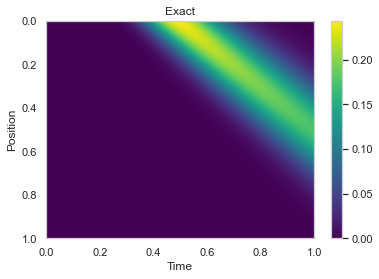

C:\Users\gaura\anaconda3\envs\newenv\lib\site-packages\ipykernel_launcher.py:173: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\gaura\anaconda3\envs\newenv\lib\site-packages\ipykernel_launcher.py:128: RuntimeWarning: overflow encountered in multiply


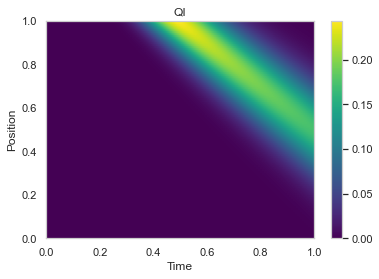

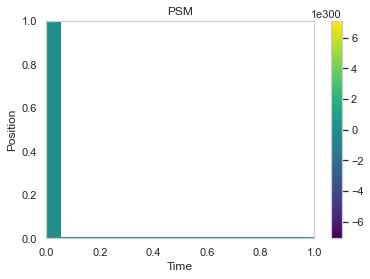

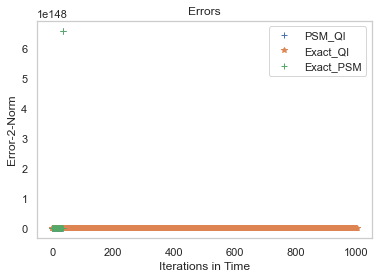

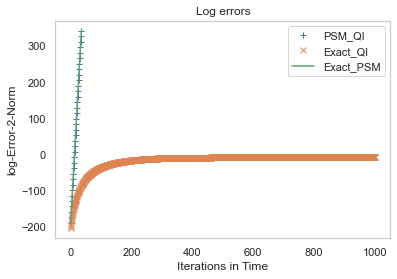

NameError: name 'errornorms' is not defined

In [19]:
errornorms = numericalcodes(int(100)+1, 1000+1)

In [ ]:
plt.plot(U_PSM[:, -100], label='PSM'); plt.plot(U_exact[:, -100], label='Exact'); plt.legend(); plt.title("At 0.1 seconds - Pe = 100")

## For the equation with zero and first order decay terms: 
Other details remain same, only d will change as shown below:

$$ \frac {\partial U}{\partial t} = D\frac {\partial^2 U}{\partial x^2} - v\frac {\partial U}{\partial x} + c*U + do $$
$$ IC: U(x, 0) = C_i $$
$$ BC - Left: U(0, t) = C_o $$
$$ BC - Right: \frac {dU(1, t)}{dx} = 0 $$ 


$$ The \ manufactured \ solution \ for \ MMS \ are: $$ 


$$ U(x,t) = C_o \cos(\pi x) e^{-t}$$


$$ \frac {dU}{dt} = -C_o\cos(\pi x) e^{-t}$$
$$ \frac {dU}{dx} = -C_o\pi \sin(\pi x) e^{-t}$$
$$ \frac {d^2U}{dx^2} = -C_o\pi^2 \cos(\pi x) e^{-t}$$

$$ The \ initial \ and \ boundary \ conditions \ for \ MMS \ are:$$
$$ U(x, 0) = C_o\cos(\pi x)$$
$$ U(0, t) = C_oe^{-t}$$

$$ \frac {dU}{dx} (1, t) = -C_o\sin(\pi 1) e^{-t} = 0$$ 



$$ The \ new \ form \ of \ d \ is \ as: $$

$$ d = \frac {dU}{dt} + v*\frac {dU}{dx}  - D*\frac {d^2U}{dx^2} - c*U - do $$
$$ d = -C_o\cos(\pi x) e^{-t} - v*C_o\pi \sin(\pi x) e^{-t} + D*C_o\pi^2 \cos(\pi x) e^{-t} - c*(C_o \cos(\pi x) e^{-t}) - do $$
$$ d =  -C_o e^{-t}(\cos(\pi x) + v*\pi \sin(\pi x) - D*\pi^2 \cos(\pi x) + c*\cos(\pi x)) - do $$




The initial and boundary condition terms:
Here left is Dirichlet and right is Neumann

$$ U(x, 0) = C_o\cos(\pi x)$$
$$ U(0, t) = C_oe^{-t}$$

$$ \frac {dU}{dx} (1, t) = -C_o\sin(\pi 1) e^{-t} = 0$$ 

Variable Coefficients a, b, c

$$ a = \sin(\pi x)$$
$$ b = \cos(\pi x) $$
$$ c = (a+b)/2$$


In [14]:
# Creating function for running the code and getting the error with different number of nodes with left dirichlet and right neumann condition. 
def numericalcodes_variable(nx, nt): 
    # Define the grid

    Co = 2.0;
    L = 1.0
    T = 1.0
    do = 0.0
    dm = np.zeros((nt, nx));
    U_exact = np.zeros((nt, nx));
    # Define x & t
    x = np.linspace(0, L, nx)
    t = np.linspace(0, T, nt)
    am = np.zeros((nt, nx))
    bm = np.zeros((nt, nx))
    cm = np.zeros((nt, nx))
    
    
    
    for i in range(nt):
        for j in range (nx):
            am[i, j] =  0.1+0.1*np.sin(np.pi*x[j])# *np.exp(-t[i]);
            bm[i, j] =  0.001+0.001*np.cos(np.pi*x[j])# *np.exp(-t[i]);
            cm[i, j] = (am[i, j]+bm[i, j])/2;
            
            dm[i, j] = -(Co*np.exp(-t[i]))*(np.cos(np.pi*x[j]) - am[i, j]*np.pi*np.sin(np.pi*x[j]) - bm[i, j]*(np.pi**2)*np.cos(np.pi*x[j]) + cm[i, j]*np.cos(np.pi*x[j])) - do
    
    # Dirichlet Boundary Condition
    left = Co * np.exp(-t); # (0.025/(np.sqrt(0.000625 + 0.02*t)))*(np.exp((-(0.5 - t)**2)/(0.00125 + 0.04*t)))*np.ones(nt)
    right = np.ones(nt)# (0.025/(np.sqrt(0.000625 + 0.02*t)))*(np.exp((-(1.5 - t)**2)/(0.00125 + 0.04*t)))*np.ones(nt)
    for i in range(nt):
        for j in range (nx):
            U_exact[i, j] = Co*np.cos(np.pi*x[j])*np.exp(-t[i])
    fig = plt.figure()  
    plt.imshow(np.transpose(U_exact), cmap='viridis',  extent=[0, T, L, 0], aspect='auto')
    plt.colorbar()
    plt.title("Exact")
    plt.xlabel('Time')
    plt.ylabel('Position')

    #fig.set_size_inches(30.,18.)
    # plt.savefig('U_CDI.png', dpi = 900)
    plt.show()


    # Discretization of space and time
    dx = L/(nx-1)
    dt = T/(nt-1)
    u = Co*np.cos(np.pi*x) #np.zeros(nx);
    def numerical_scheme_QI(u_QI, a, b, c, d, dx, dt, l, r):
        alpha = a*dt
        beta = b*dt

        A = np.zeros((len(u_QI), len(u_QI)))
        bi = d*dt+u_QI;
        cQ = 3*alpha/(8*dx) - beta/(dx**2)
        bQ = -7*alpha/(8*dx) - beta/(dx**2)
        aQ = 3*alpha/(8*dx) + 2*beta/(dx**2) - c*dt
        eQ = 1*alpha/(8*dx)

        cnQ = 7*alpha/(8*dx) - beta/(dx**2)
        bnQ = -3*alpha/(8*dx) - beta/(dx**2)
        anQ = -3*alpha/(8*dx) + 2*beta/(dx**2) - c*dt
        enQ = -1*alpha/(8*dx)


        for j in range(1, len(u_QI)-2):

            A[j, j-1] = cQ[j]
            A[j, j] = 1+aQ[j]
            A[j, j+1] = bQ[j]
            A[j, j+2] = eQ[j]

        N = len(u_QI)-1

        A[N-1, N-2] = cnQ[N-1]  # applied the a>0 terms for this one
        A[N-1, N-1] = 1+anQ[N-1]
        A[N-1, N] = bnQ[N-1]
        A[N-1, N-3] = enQ[N-1]


        # Boundary condition
        # A[0, 0] = -3
        # A[0, 1] = 4
        # A[0, 2] = -1
        # bi[0] = 0

        A[N, N] = 3
        A[N, N-1] = -4
        A[N, N-2] = 1
        bi[N] = 0

        A[0,0] = 1.0
        # A[N,N] = 1.0

        bi[0] = l
        # bi[N] = r



        u_QI = solve(A, bi)

        return u_QI

    U_QI = np.zeros((nx, nt))
    U_PSM = np.zeros((nx, nt))
    error_2norm_PSM_QI = np.zeros(nt)

    error_2norm_Qexact_QI = np.zeros(nt)
    error_2norm_Qexact_PSM = np.zeros(nt)

    u_QI=u;
    u_PSM=u;

    for n in range(nt):
        # print(n)

        
        u_PSM = numerical_scheme_PSM(u_PSM, am[n, :], bm[n, :], cm[n, :], dm[n, :], dx, dt, left[n], right[n])#print(u)
        #print(str(n*dt)+" "+str(max(u)))
        U_PSM[:, n] = u_PSM


        u_QI = numerical_scheme_QI(u_QI, am[n, :], bm[n, :], cm[n, :], dm[n, :], dx, dt, left[n], right[n])
        #print(u)
        #print(str(n*dt)+" "+str(max(u)))
        U_QI[:, n] = u_QI
        error = u_PSM - u_QI
        error_2norm_PSM_QI[n] = np.linalg.norm(error)/np.sqrt(nx)

        error = U_exact[:, n] - u_QI
        error_2norm_Qexact_QI[n] = np.linalg.norm(error)/np.sqrt(nx)

        error = U_exact[:, n] - u_PSM
        error_2norm_Qexact_PSM[n] = np.linalg.norm(error)/np.sqrt(nx)


    plt.rcParams['font.size'] = 18
    fig = plt.figure() 
    plt.imshow(U_QI, cmap='viridis', extent=[0, T, 0, L], aspect='auto')
    plt.colorbar()
    plt.title("QI")
    plt.xlabel('Time')
    plt.ylabel('Position')

    #fig.set_size_inches(30.,18.)
    # plt.savefig('U_QI.png', dpi = 900)
    plt.show()

    fig = plt.figure() 
    plt.imshow(U_PSM, cmap='viridis', extent=[0, T, 0, L], aspect='auto')
    plt.colorbar()
    plt.title("PSM")
    plt.xlabel('Time')
    plt.ylabel('Position')

    #fig.set_size_inches(30.,18.)
    # plt.savefig('U_QI.png', dpi = 900)
    plt.show()

    fig = plt.figure() 
    plt.plot(error_2norm_PSM_QI, '+', label = 'PSM_QI')
    plt.plot(error_2norm_Qexact_QI, '*', label = 'Exact_QI')
    plt.plot(error_2norm_Qexact_PSM, '+', label = 'Exact_PSM')
    plt.title("Errors")
    plt.legend()
    plt.xlabel('Iterations in Time')
    plt.ylabel('Error-2-Norm')
    plt.show()

    fig = plt.figure() 
    plt.plot(np.log(error_2norm_PSM_QI), '+', label = 'PSM_QI')
    plt.plot(np.log(error_2norm_Qexact_QI), 'x', label = 'Exact_QI')
    plt.plot(np.log(error_2norm_Qexact_PSM), '-', label = 'Exact_PSM')

    plt.legend()
    plt.title("Log errors")
    plt.xlabel('Iterations in Time')
    plt.ylabel('log-Error-2-Norm')

    #fig.set_size_inches(30.,18.)
    # plt.savefig('Log-ErrorNorm.png', dpi = 900)
    plt.show()

        return errornorms

SyntaxError: 'return' outside function (<ipython-input-14-5f5dfc570538>, line 185)

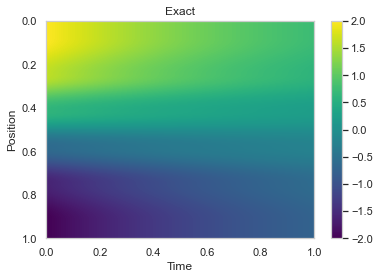

NameError: name 'numerical_scheme_PSM' is not defined

In [15]:
# For ordered grid increases with variable coefficients with x and t
# Equation with first order decay term 

# Spatial MMS tests
errorsx = np.ones((10, 7))
errornorms = np.ones(7)
nx = 20;
nt = 1000;
#nxs = np.linspace(20, 400, 10)

nxs = [5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560]
nts = [250, 500, 1000, 2000, 4000]
for i in range(10):
    nx = nxs[i]
    errornorms = numericalcodes_variable(int(nx)+1, nt+1)
    errorsx[i, 0] = errornorms[0]
    errorsx[i, 1] = errornorms[1]
    errorsx[i, 2] = errornorms[2]
    errorsx[i, 3] = errornorms[3]
    errorsx[i, 4] = errornorms[4]
    errorsx[i, 5] = errornorms[5]
    errorsx[i, 6] = errornorms[6]
    
plt.figure()
fig.set_size_inches(10.,7.)
plt.plot(nxs, errorsx[:, 0], '-', label = 'CDI')
plt.plot(nxs, errorsx[:, 1], '.-', label = 'CDCN')
plt.plot(nxs, errorsx[:, 2], '-+', label = 'QI')
plt.plot(nxs, errorsx[:, 3], '-*', label = 'QCN')
plt.plot(nxs, errorsx[:, 4], '-x', label = 'eCDI')
plt.plot(nxs, errorsx[:, 5], '--', label = 'eCDCN')
plt.plot(nxs, errorsx[:, 6], '-v', label = 'eQI')
plt.xlabel('Grid Numbers')
plt.ylabel('Error Norms')
plt.legend()

plt.figure()
fig.set_size_inches(10.,7.)
px = np.zeros((8, 7))
for g in range(8):
    for k in range(7):
        px[g, k] = np.log((np.abs(errorsx[g+2, k]) - np.abs(errorsx[g+1, k]))/(np.abs(errorsx[g+1, k]) - np.abs(errorsx[g, k])))/(np.log(nxs[g]/nxs[g+1]))

plt.plot(nxs[0:8], px[:, 0], '-', label = 'CDI')
plt.plot(nxs[0:8], px[:, 1], '-.', label = 'CDCN')
plt.plot(nxs[0:8], px[:, 2], '-+', label = 'QI')
plt.plot(nxs[0:8], px[:, 3], '-*', label = 'QCN')
plt.plot(nxs[0:8], px[:, 4], '-x', label = 'eCDI')
plt.plot(nxs[0:8], px[:, 5], '--', label = 'eCDCN')
plt.plot(nxs[0:8], px[:, 6], '-v', label = 'eQI')
plt.xlabel('Spatial Grid Numbers')
plt.ylabel('Observed Order')
plt.legend()

# Printing the spatial grid tests

zipped1 = list(zip(nxs, errorsx[:, 0], errorsx[:, 1], errorsx[:, 2], errorsx[:, 3], errorsx[:, 4], errorsx[:, 5], errorsx[:, 6], px[:, 0], px[:, 1], px[:, 2], px[:, 3], px[:, 4], px[:, 5], px[:, 6]))
df2 = pd.DataFrame(zipped1, columns=['Spatial Discretization Numbers', 'CDI_Error', 'CDCN_Error', 'QI_Error', 'QCN_Error', 'eCDI_Error', 'eCDCN_Error', 'eQI_Error', 'CDI_Order', 'CDCN_Order', 'QI_Order', 'QCN_Order', 'eCDI_Order', 'eCDCN_Order', 'eQI_Order'])

df2.to_csv('Analysis_Spatial25_Variable_Ordered.csv', index=False)


In [ ]:
# Temporal MMS tests
errorst = np.ones((7, 7))
errornorms = np.ones(7)
nx = 100;
nt = 50;
nxs = [25, 50, 100, 200, 400]
nts = [50, 100, 200, 400, 800, 1600, 3200]
for i in range(7):
    nt = nts[i]
    errornorms = numericalcodes_complete(nx, nt)
    errorst[i, 0] = errornorms[0]
    errorst[i, 1] = errornorms[1]
    errorst[i, 2] = errornorms[2]
    errorst[i, 3] = errornorms[3]
    errorst[i, 4] = errornorms[4]
    errorst[i, 5] = errornorms[5]
    errorst[i, 6] = errornorms[6]
    
print(errors)
plt.figure()
fig.set_size_inches(10.,7.)
plt.plot(nts, errorst[:, 0], '-', label = 'CDI')
plt.plot(nts, errorst[:, 1], '.-', label = 'CDCN')
plt.plot(nts, errorst[:, 2], '-+', label = 'QI')
plt.plot(nts, errorst[:, 3], '-*', label = 'QCN')
plt.plot(nts, errorst[:, 4], '-x', label = 'eCDI')
plt.plot(nts, errorst[:, 5], '--', label = 'eCDCN')
plt.plot(nts, errorst[:, 6], '-v', label = 'eQI')
plt.legend()

plt.figure()
fig.set_size_inches(10.,7.)
pt = np.zeros((5, 7))
for g in range(5):
    for k in range(7):
        pt[g, k] = np.log((np.abs(errorst[g+2, k]) - np.abs(errorst[g+1, k]))/(np.abs(errorst[g+1, k]) - np.abs(errorst[g, k])))/(np.log(nxs[g]/nxs[g+1]))

plt.plot(nxs[0:5], pt[:, 0], '-', label = 'CDI')
plt.plot(nxs[0:5], pt[:, 1], '.-', label = 'CDCN')
plt.plot(nxs[0:5], pt[:, 2], '-+', label = 'QI')
plt.plot(nxs[0:5], pt[:, 3], '-*', label = 'QCN')
plt.plot(nxs[0:5], pt[:, 4], '-x', label = 'eCDI')
plt.plot(nxs[0:5], pt[:, 5], '-v', label = 'eCDCN')
plt.plot(nxs[0:5], pt[:, 6], '--', label = 'eQI')
plt.xlabel('Grid Numbers')
plt.ylabel('Observed Order')
plt.legend()
# Printing the temporal grid tests
zipped2 = list(zip(nts, errorst[:, 0], errorst[:, 1], errorst[:, 2], errorst[:, 3], errorst[:, 4], errorst[:, 5], errorst[:, 6],  pt[:, 0], pt[:, 1], pt[:, 2], pt[:, 3], pt[:, 4], pt[:, 5], pt[:, 6]))

df2 = pd.DataFrame(zipped2, columns=['Temporal Discretization Numbers', 'CDI_Error', 'CDCN_Error', 'QI_Error', 'QCN_Error', 'eCDI_Error', 'eCDCN_Error', 'eQI_Error', 'CDI_Order', 'CDCN_Order', 'QI_Order', 'QCN_Order', 'eCDI_Order', 'eCDCN_Order', 'eQI_Order'])

df2.to_csv('Analysis_Temporal250_complete.csv', index=False)
